<a href="https://colab.research.google.com/github/BiswarupMukherjee1/GRIP-Task1/blob/main/SparkFoundation_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GRIP - DATA SCIENCE AND BUSINESS ANALYTICS - TASK 1

## **Predict the percentage of student based on the no. of study hours.**

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Importing The Dataset

In [5]:
data = pd.read_csv('http://bit.ly/w-data')
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Check for Null values

In [6]:
data.isnull == True

False

# Visualization of Data

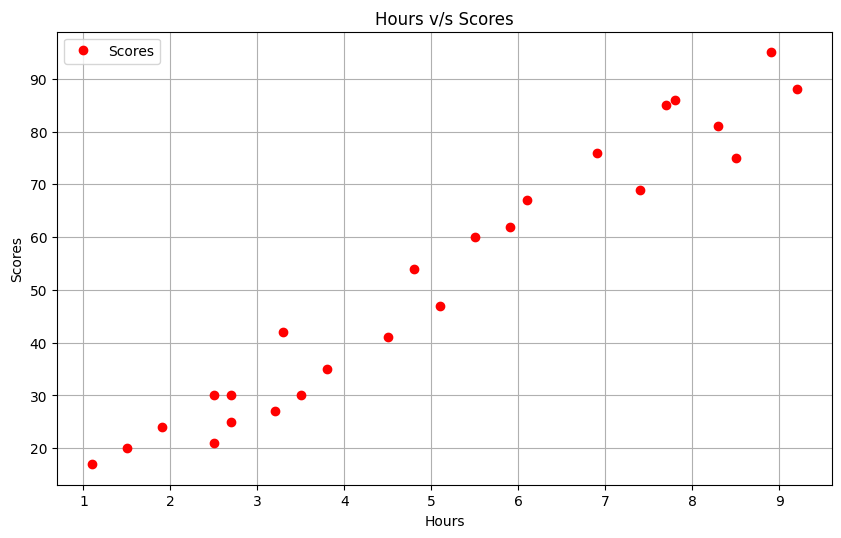

In [7]:
plt.figure(figsize=(10,6), dpi = 100)
plt.plot(data['Hours'].tolist(), data['Scores'].tolist(), 'ro', label = 'Scores')
plt.title('Hours v/s Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.grid(True)
plt.legend()
plt.show()

**From the scatterplot, we can find a correlation between Hours and Scores. We will plot a regression line to confirm the correlation**

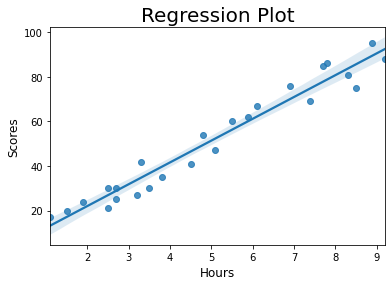

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [8]:
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Scores', size=12)
plt.xlabel('Hours', size=12)
plt.show()
print(data.corr())

We can see the variables are positively correlated.

# Data Preparation

In [9]:
X = data.iloc[:,:-1].values
y = data.iloc[:,1].values
print(X)
print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


# Training the Model

### **Splitting the Data**

In [10]:
# Defining X and y from  Data
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

# Spliting the Data 
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

### **Fitting Data into Model**

In [11]:
regression = LinearRegression()
regression.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Predicting the percentage of Marks

In [12]:
pred_y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


# Comparing the Predicted Marks with the Actual Marks

In [13]:
compare_scores = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


Visually Comparing  Predicted Marks with the Actual Marks

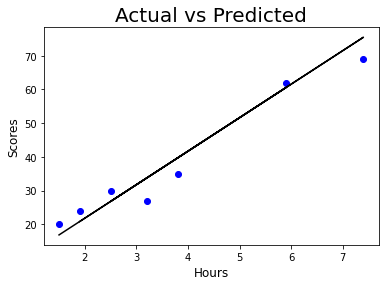

In [16]:
plt.scatter(x=val_X, y=val_y, color='blue')
plt.plot(val_X, pred_y, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Scores', size=12)
plt.xlabel('Hours', size=12)
plt.show()

# Evaluating the Model

In [19]:
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(val_y,pred_y))

Mean absolute error:  4.130879918502482


# **What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?**

In [20]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.893
